1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
# test number: -431 in DEC = (1)110101111 in BIN = (1)1AF in HEX ---> (_) = sign bit

# BIN to DEC converter
def bindec(x):   # 'x' = BIN number as string
    res = 0
    for i in range(1, len(x)):   # from the MSB to the LSB of 'x'
        res += int(x[i]) * 2**(len(x)-1-i)
    if int(x[0]) == 1:   # 'x[0]' = sign bit of 'x' 
        res *= -1
    return res

x = "1110101111"
print("BIN to DEC converter")
print("Number in BIN representation:", x)
print("Number in DEC representation:", bindec(x))
    
# HEX to DEC converter
def hexdec(x):   # 'x' = HEX number as string
    digits = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15}   # conversions of digit values
    res = 0
    for i in range(1, len(x)):   # from the MSB to the LSB of 'x'
        res += digits[x[i].upper()] * 16**(len(x)-1-i)   # using 'upper()' to ignore differences in capitalization
    if int(x[0]) == 1:   # 'x[0]' = sign bit of 'x' 
        res *= -1
    return res

x = "11aF"
print("\nHEX to DEC converter")
print("Number in HEX representation:", x)
print("Number in DEC representation:", hexdec(x))
    
# DEC to BIN converter
def decbin(x):   # 'x' = DEC number as int
    temp = ""   # will be the string of the BIN number written in reverse order
    quotient = abs(x)
    while quotient > 0:
        remainder = quotient % 2
        quotient //= 2
        temp += str(remainder)
    if x > 0:
        temp += "0"
    else:
        temp += "1"
    res = "".join(reversed(temp))
    return res

x = -431
print("\nDEC to BIN converter")
print("Number in DEC representation:", x)
print("Number in BIN representation:", decbin(x))

# DEC to HEX converter
def dechex(x):   # 'x' = DEC number as int
    digits = "0123456789ABCDEF"   # conversions of digit values
    temp = ""   # will be the string of the HEX number written in reverse order
    quotient = abs(x)
    while quotient > 0:
        remainder = quotient % 16
        quotient //= 16
        temp += digits[remainder]
    if x > 0:
        temp += "0"
    else:
        temp += "1"
    res = "".join(reversed(temp))
    return res

x = -431
print("\nDEC to HEX converter")
print("Number in DEC representation:", x)
print("Number in HEX representation:", dechex(x))

BIN to DEC converter
Number in BIN representation: 1110101111
Number in DEC representation: -431

HEX to DEC converter
Number in HEX representation: 11aF
Number in DEC representation: -431

DEC to BIN converter
Number in DEC representation: -431
Number in BIN representation: 1110101111

DEC to HEX converter
Number in DEC representation: -431
Number in HEX representation: 11AF


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
def float32(x):   # 'x' = 32 bit word as string
    s = int(x[0])   # sign = 1st bit of 'x' from left
    e = int(x[1:9], 2)   # exponent = from the 2nd to the 9th bit of 'x' from left
    f = x[9:]   # fractional part = from the 10th to the last bit of 'x' from left
    b = 127   # bias
    m = 1   # mantissa
    for i in range(len(f)):
        m += int(f[i]) * 2**(-1-i)
    res = ((-1)**s) * m * (2**(e-b))
    return res

x = "11000000101100000000000000000000"
print("32 bit word:", x)
print("Corresponding single precision floating point number:", float32(x))

32 bit word: 11000000101100000000000000000000
Corresponding single precision floating point number: -5.5


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
import sys, math as m

# integer underflow limit
def int_min():
    res = 1   # will be the limit
    while res/2 > 0:
        res /= 2
    return res

print("Integer underflow limit (within a factor of 2):", int_min())

# float underflow limit
def float_min():
    res = 1.   # will be the limit
    while res/2. > 0:
        res /= 2.
    return res

print("Float underflow limit (within a factor of 2):", float_min())

# integer overflow limit
def int_max():
    res = 1   # will be the limit
    while res <= sys.maxsize:
        res *= 2
    if res > sys.maxsize:
        res = m.inf
    return res

print("Integer overflow limit (within a factor of 2):", int_max())

# float overflow limit
def float_max():
    res = 1.   # will be the limit
    while res*2. != m.inf:
        res *= 2.
    return res

print("Float overflow limit (within a factor of 2):", float_max())

Integer underflow limit (within a factor of 2): 5e-324
Float underflow limit (within a factor of 2): 5e-324
Integer overflow limit (within a factor of 2): inf
Float overflow limit (within a factor of 2): 8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [4]:
def precision():
    var = 0
    prec = 1   # will be the machine precision
    while var + prec != var:
        var += prec
        prec /= 2
    return prec

print("Machine precision:", precision())

Machine precision: 5.551115123125783e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [5]:
def quadratic_a(a, b, c):
    delta = b**2 - 4*a*c
    sqrt_delta = delta**(1/2)
    x1 = (-b + sqrt_delta) / (2*a)
    x2 = (-b - sqrt_delta) / (2*a)
    print("Solutions of %f*x^2 + %f*x + %f = 0 computed with 'quadratic_a':" % (a, b, c))
    print("x1 =", x1)
    print("x2 =", x2)
    print("Accuracy of 'x1':")
    print("%f*(x1)^2 + %f*x1 + %f =" % (a, b, c), a*(x1**2) + b*x1 + c)   # should be as close to 0 as possible
    print("Accuracy of 'x2':")
    print("%f*(x2)^2 + %f*x2 + %f =" % (a, b, c), a*(x2**2) + b*x2 + c)
    
# question 'a'
a = 0.001
b = 1000
c = 0.001
quadratic_a(a, b, c)

# question 'b'
def quadratic_b(a, b, c):
    delta = b**2 - 4*a*c
    sqrt_delta = delta**(1/2)
    x1 = -2*c / (b + sqrt_delta)
    x2 = 2*c / (-b + sqrt_delta)
    print("Solutions of %f*x^2 + %f*x + %f = 0 computed with 'quadratic_b':" % (a, b, c))
    print("x1 =", x1)
    print("x2 =", x2)
    print("Accuracy of 'x1':")
    print("%f*(x1)^2 + %f*x1 + %f =" % (a, b, c), a*(x1**2) + b*x1 + c)
    print("Accuracy of 'x2':")
    print("%f*(x2)^2 + %f*x2 + %f =" % (a, b, c), a*(x2**2) + b*x2 + c)

print("")
quadratic_b(a, b, c)

print("\nIt follows that 'x1' is calculated more accurately by 'quadratic_b' while 'x2' is calculated more accurately by 'quadratic_a'!")
print("This could be due to the 'catastrophic cancellation' that occurs in the term (-b + sqrt_delta).")
print("In fact, this term appears both in the 'x1' solution of 'quadratic_a' and in the 'x2' solution of 'quadratic_b'.")
print("So it makes sense to define 'quadratic_c' which computes 'x1' as does 'quadratic_b' and 'x2' as does 'quadratic_a':")

# question 'c'
def quadratic_c(a, b, c):
    delta = b**2 - 4*a*c
    sqrt_delta = delta**(1/2)
    x1 = -2*c / (b + sqrt_delta)
    x2 = (-b - sqrt_delta) / (2*a)
    print("Solutions of %f*x^2 + %f*x + %f = 0 computed with 'quadratic_c':" % (a, b, c))
    print("x1 =", x1)
    print("x2 =", x2)
    print("Accuracy of 'x1':")
    print("%f*(x1)^2 + %f*x1 + %f =" % (a, b, c), a*(x1**2) + b*x1 + c)
    print("Accuracy of 'x2':")
    print("%f*(x2)^2 + %f*x2 + %f =" % (a, b, c), a*(x2**2) + b*x2 + c)

print("")
quadratic_c(a, b, c)

Solutions of 0.001000*x^2 + 1000.000000*x + 0.001000 = 0 computed with 'quadratic_a':
x1 = -9.999894245993346e-07
x2 = -999999.999999
Accuracy of 'x1':
0.001000*(x1)^2 + 1000.000000*x1 + 0.001000 = 1.0575401665491313e-08
Accuracy of 'x2':
0.001000*(x2)^2 + 1000.000000*x2 + 0.001000 = 7.247924804689582e-08

Solutions of 0.001000*x^2 + 1000.000000*x + 0.001000 = 0 computed with 'quadratic_b':
x1 = -1.000000000001e-06
x2 = -1000010.5755125057
Accuracy of 'x1':
0.001000*(x1)^2 + 1000.000000*x1 + 0.001000 = 0.0
Accuracy of 'x2':
0.001000*(x2)^2 + 1000.000000*x2 + 0.001000 = 10575.62534720993

It follows that 'x1' is calculated more accurately by 'quadratic_b' while 'x2' is calculated more accurately by 'quadratic_a'!
This could be due to the 'catastrophic cancellation' that occurs in the term (-b + sqrt_delta).
In fact, this term appears both in the 'x1' solution of 'quadratic_a' and in the 'x2' solution of 'quadratic_b'.
So it makes sense to define 'quadratic_c' which computes 'x1' as does

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 0.01: 1.010000000000001
Derivative of f(x) = x(x-1) at the point x = 1 calculated analytically: 1
The two results don't agree perfectly! This could be due to the 'catastrophic cancellation' that occurs in the term (f(x+delta) - f(x)) of 'd_dx'.
Accuracy of the approximate result calculated with delta = 0.01: 0.010000000000000897

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 0.0001: 1.0000999999998899
Accuracy of the approximate result calculated with delta = 0.0001: 9.999999988985486e-05

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 1e-06: 1.0000009999177333
Accuracy of the approximate result calculated with delta = 1e-06: 9.99917733279787e-07

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 1e-08: 1.0000000039225287

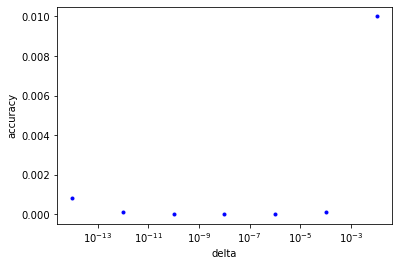


More data is needed to understand the trend for delta values between 10^-4 and 10^-2! Let's obtain them...

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 0.00015848931924611142: 1.0001584893192588
Accuracy of the approximate result calculated with delta = 0.00015848931924611142: 0.00015848931925876997

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 0.00025118864315095795: 1.0002511886428374
Accuracy of the approximate result calculated with delta = 0.00025118864315095795: 0.0002511886428373522

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 0.00039810717055349735: 1.0003981071704122
Accuracy of the approximate result calculated with delta = 0.00039810717055349735: 0.00039810717041222077

Derivative of f(x) = x(x-1) at the point x = 1 calculated using the derivative definition with delta = 0.000630957344480193: 1.000630

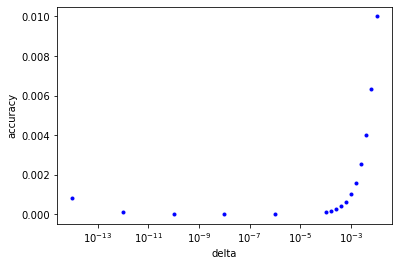

In [6]:
def f(x):
    return x*(x-1)

# question 'a'
# calculation using the derivative definition
def d_dx(f, x, delta):
    res = (f(x+delta) - f(x)) / delta
    return res

x = 1
delta = 10**-2
approx_der = d_dx(f, x, delta)
print("Derivative of f(x) = x(x-1) at the point x = " + str(x) + " calculated using the derivative definition with delta = " + str(delta) + ":", approx_der)

# analytical calculation 
def f_prime(x):
    return 2*x - 1

true_der = f_prime(x)
print("Derivative of f(x) = x(x-1) at the point x = " + str(x) + " calculated analytically:", true_der)

print("The two results don't agree perfectly! This could be due to the 'catastrophic cancellation' that occurs in the term (f(x+delta) - f(x)) of 'd_dx'.")

# evaluating the accuracy of the result obtained using the derivative definition
accuracy = abs(approx_der - true_der)
print("Accuracy of the approximate result calculated with delta = " + str(delta) + ":", accuracy)

# question 'b'
# preparing data
deltas = []
accuracies = []
deltas.append(delta)
accuracies.append(accuracy)

for i in range (4, 15, 2):
    delta = 10**-i
    approx_der = d_dx(f, x, delta)
    print("\nDerivative of f(x) = x(x-1) at the point x = " + str(x) + " calculated using the derivative definition with delta = " + str(delta) + ":", approx_der)
    accuracy = abs(approx_der - true_der)
    print("Accuracy of the approximate result calculated with delta = " + str(delta) + ":", accuracy)
    deltas.append(delta)
    accuracies.append(accuracy)

# plotting data
print("\nPlotting (delta, accuracy):")
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(deltas, accuracies, '.', color='blue')
plt.xlabel('delta')
plt.ylabel('accuracy')
plt.xscale('log')
plt.show()

print("\nMore data is needed to understand the trend for delta values between 10^-4 and 10^-2! Let's obtain them...")

for i in range(1, 10):
    delta = 10**(-4+(i/5))
    approx_der = d_dx(f, x, delta)
    print("\nDerivative of f(x) = x(x-1) at the point x = " + str(x) + " calculated using the derivative definition with delta = " + str(delta) + ":", approx_der)
    accuracy = abs(approx_der - true_der)
    print("Accuracy of the approximate result calculated with delta = " + str(delta) + ":", accuracy)
    deltas.append(delta)
    accuracies.append(accuracy)
    
# plotting data
print("\nPlotting (delta, accuracy):")
plt.plot(deltas, accuracies, '.', color='blue')
plt.xlabel('delta')
plt.ylabel('accuracy')
plt.xscale('log')
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


Integral of the semicircle of radius 1 calculated using the Riemann definition with N = 100: 1.5691342555492505
True value of the integral of the semicircle of radius 1: 1.5707963267948966
Percentage error with N = 100: 0.10581074180619238

Computation time with N = 100: 0.00018949999999984257 s
Computation time with N = 1000: 0.0010892000000000124 s
Computation time with N = 10000: 0.005830800000000025 s
Computation time with N = 100000: 0.04933759999999987 s
Computation time with N = 1000000: 0.4878427999999997 s
Computation time with N = 10000000: 4.674329500000001 s
Order of magnitude of N such that the calculation is performed in less than 1 second: 1000000

Plotting (N, comptime):


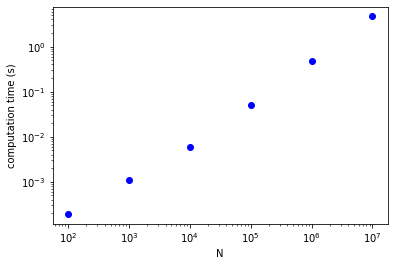


Value of N such that the calculation is performed in about 1 minute: 128360655
Computation time with N = 128360655: 60.7425736 s
Percentage error with N = 128360655: 4.6633999529547295e-11


In [7]:
# question 'a'
def riemann_sum(f, low, up, N):   # 'low' = lower boundary of the integration interval, 'up' = upper boundary of the integration interval
    width = up - low   # 'width' = width of the integration interval
    h = width / N
    res = 0
    for k in range(1, N+1):
        x_k = low + k*h
        y_k = f(x_k)
        res += h*y_k
    return res

def g(x):   # argument of the integral
    return (1-x**2)**(1/2)

low = -1
up = 1
N = 100
approx_sum = riemann_sum(g, low, up, N)
print("Integral of the semicircle of radius 1 calculated using the Riemann definition with N = " + str(N) + ":", approx_sum)

true_sum = m.pi / 2   # true value of the integral
print("True value of the integral of the semicircle of radius 1:", true_sum)
perc_err = abs((approx_sum - true_sum) / true_sum) * 100   # percentage error
print("Percentage error with N = " + str(N) + ":", perc_err)

# question 'b'
import time
start = time.perf_counter()
riemann_sum(g, low, up, N)
stop = time.perf_counter()
comptime = stop - start   # execution time of 'riemann_sum(g, low, up, N)'
print("\nComputation time with N = " + str(N) + ":", comptime, "s")

# preparing data
Ns = []
comptimes = []
Ns.append(N)
comptimes.append(comptime)

while comptime < 1:
    N *= 10
    start = time.perf_counter()
    riemann_sum(g, low, up, N)
    stop = time.perf_counter()
    comptime = stop - start
    print("Computation time with N = " + str(N) + ":", comptime, "s")
    Ns.append(N)
    comptimes.append(comptime)
N //= 10
print("Order of magnitude of N such that the calculation is performed in less than 1 second:", N)

# plotting data
print("\nPlotting (N, comptime):")
plt.plot(Ns, comptimes, 'o', color='blue')
plt.xlabel('N')
plt.ylabel('computation time (s)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# the computation time seems to increase linearly with N, so the value of N such that the calculation is performed in about 1 minute is the following:

N = int((Ns[-1] / comptimes[-1]) * 60)   # using the largest values of 'N' and 'comptime' so that the result of the division is as accurate as possible
print("\nValue of N such that the calculation is performed in about 1 minute:", N)
start = time.perf_counter()
approx_sum = riemann_sum(g, low, up, N)
stop = time.perf_counter()
comptime = stop - start
print("Computation time with N = " + str(N) + ":", comptime, "s")

perc_err = abs((approx_sum - true_sum) / true_sum) * 100
print("Percentage error with N = " + str(N) + ":", perc_err)